<a href="https://www.kaggle.com/code/saidhamedsaidmohamed/car-price-prediction?scriptVersionId=194199368" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


# Car Price Prediction

## 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score


## 2. Reading and Cleaning Data


In [3]:
df=pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')

In [4]:
df.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16053,45813053,10000,-,NISSAN,Presage,2004,Minivan,No,CNG,2.5,0 km,4.0,Automatic,4x4,04-May,Right-hand drive,Beige,4
3019,45802252,36068,777,HYUNDAI,H1,2014,Minivan,Yes,Diesel,2.5,85933 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
8477,45783430,7840,-,MITSUBISHI,Grandis,2003,Minivan,No,Petrol,2.4,261000 km,4.0,Tiptronic,4x4,04-May,Right-hand drive,Black,2
8129,45489951,8781,1268,TOYOTA,Aqua,2012,Hatchback,No,Hybrid,1.5,105000 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,2
15171,45811107,470,780,CHEVROLET,Cruze,2019,Sedan,Yes,Petrol,1.4,17600 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [5]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
df.shape

(19237, 18)

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
df.duplicated().sum()

313

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.Levy.replace({'-':'0'},inplace=True)

## 3. Data Analysis


In [13]:
for col in df.columns:
    print(col,":",df[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


In [14]:
df_int=df.select_dtypes(include=['int64','float64'])
df_int

,ID,Price,Prod. year,Cylinders,Airbags
0,45654403,13328,2010,6.0,12
1,44731507,16621,2011,6.0,8
2,45774419,8467,2006,4.0,2
3,45769185,3607,2011,4.0,0
4,45809263,11726,2014,4.0,4
...,...,...,...,...,...
19232,45798355,8467,1999,4.0,5
19233,45778856,15681,2011,4.0,8
19234,45804997,26108,2010,4.0,4
19235,45793526,5331,2007,4.0,4


In [15]:
co=df_int.corr()
co

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


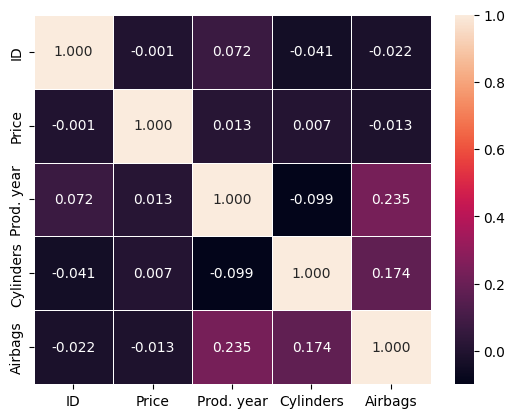

In [16]:
sns.heatmap(co,lw='0.5',annot=True,fmt=".3f")
plt.show()

In [17]:
df_obj=df.select_dtypes(include='object')
df_obj

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


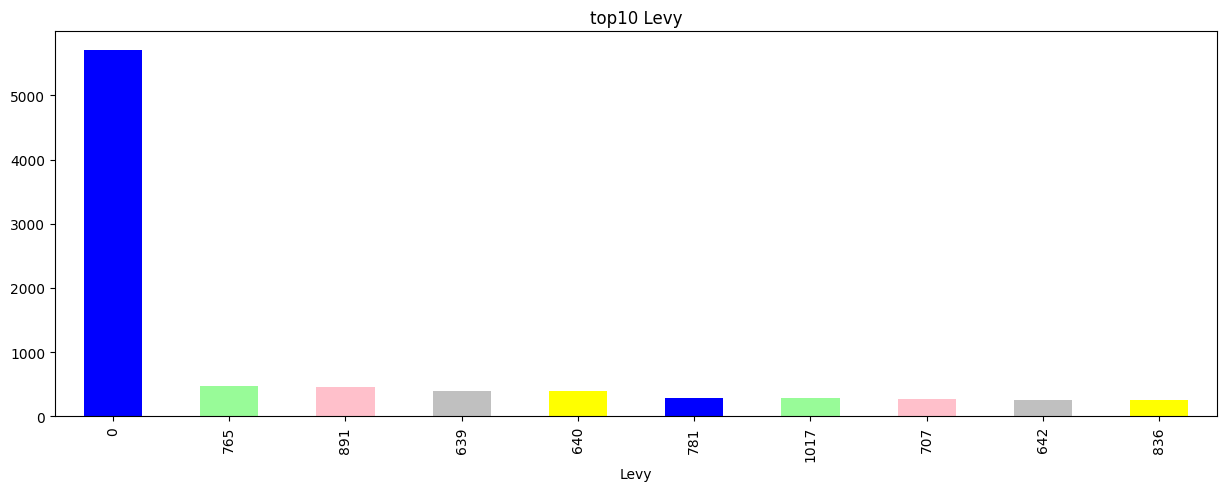

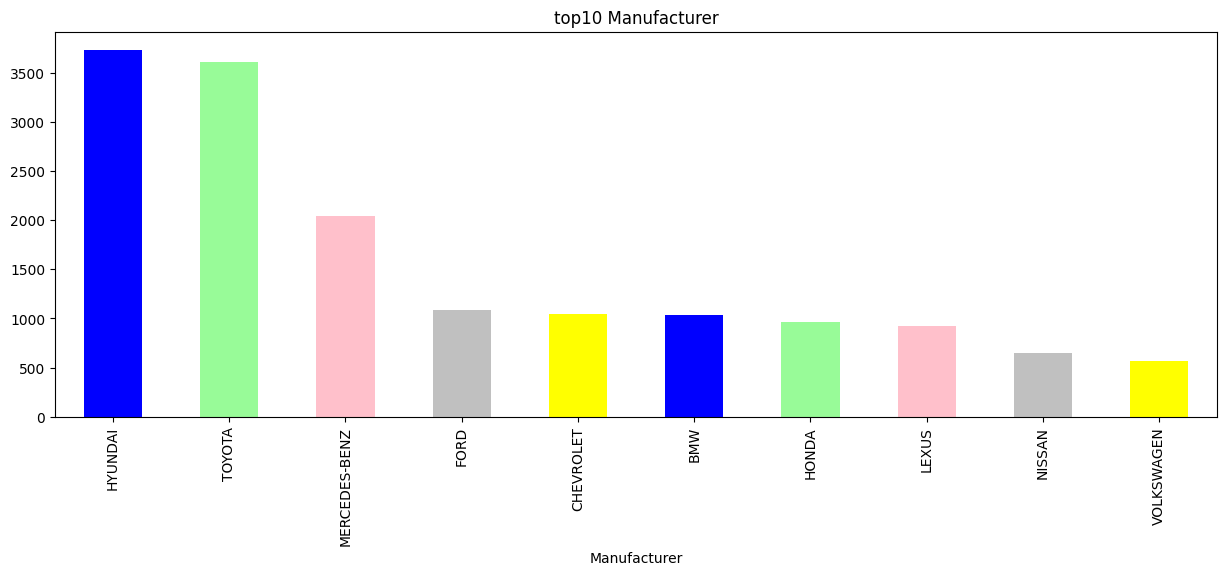

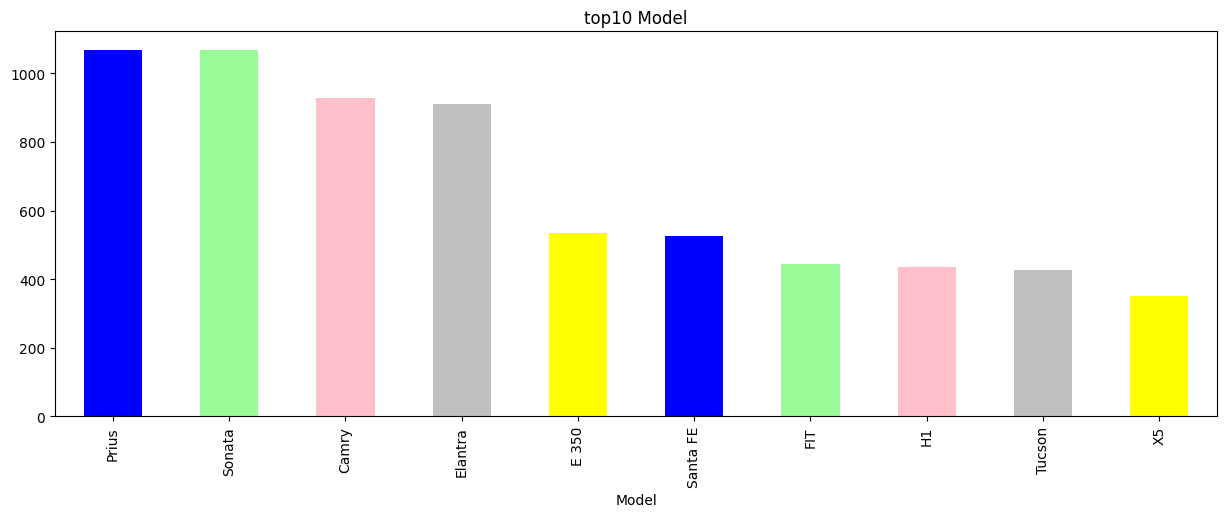

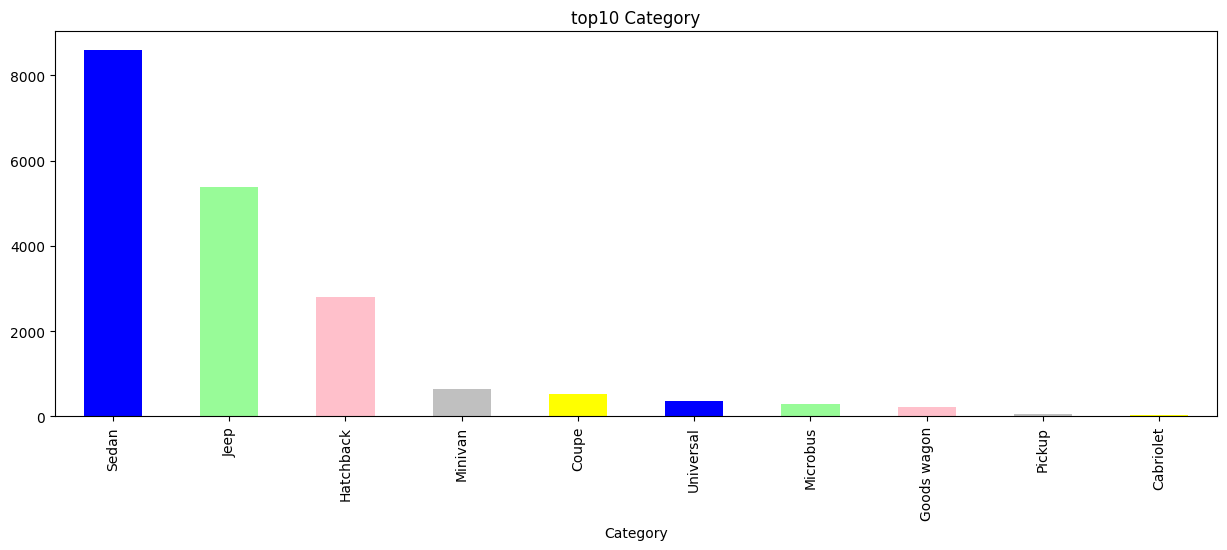

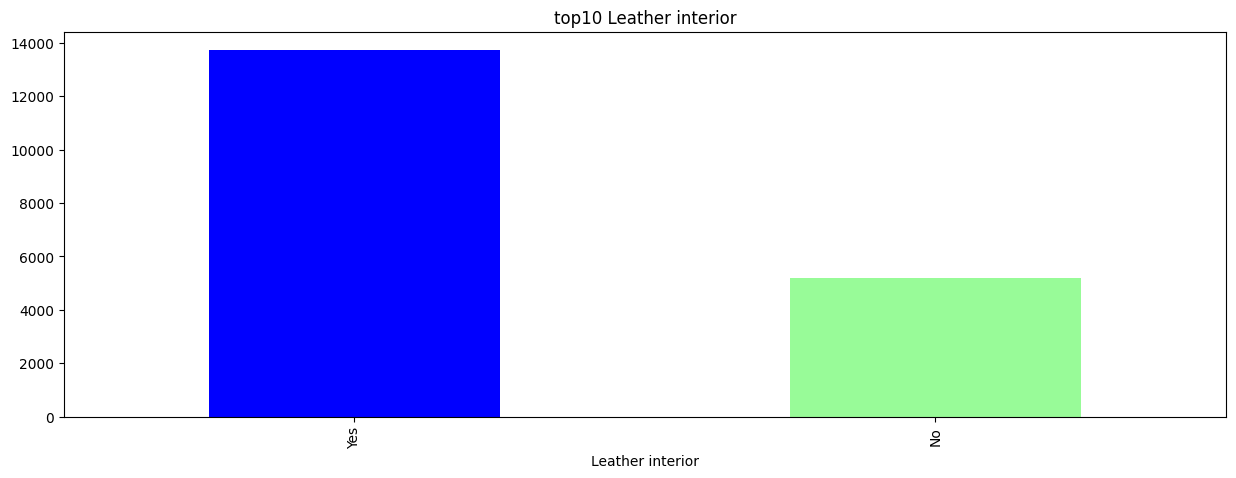

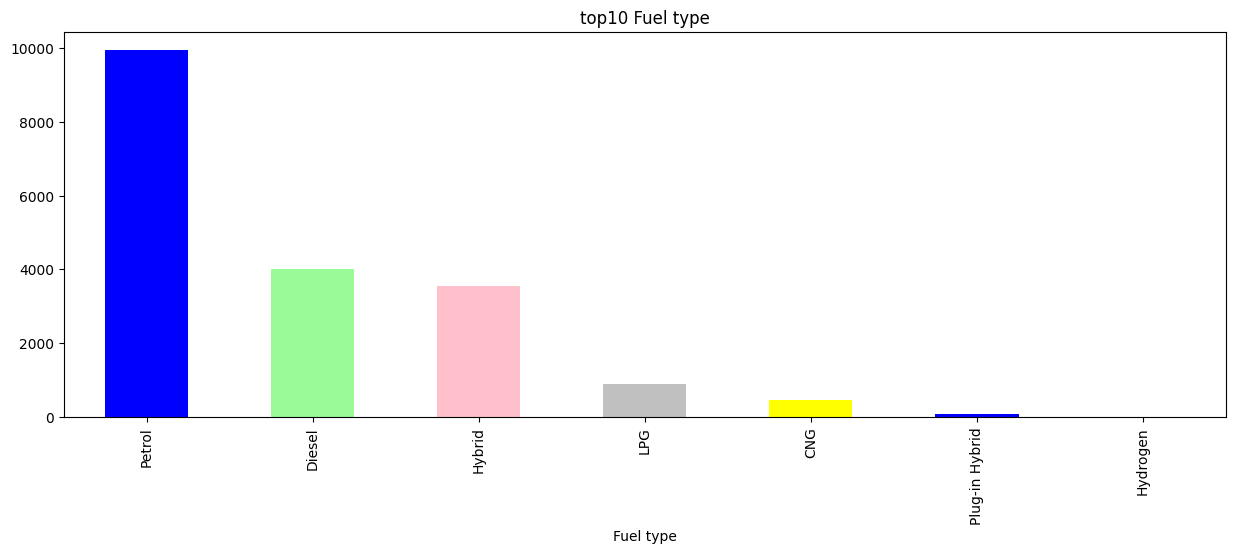

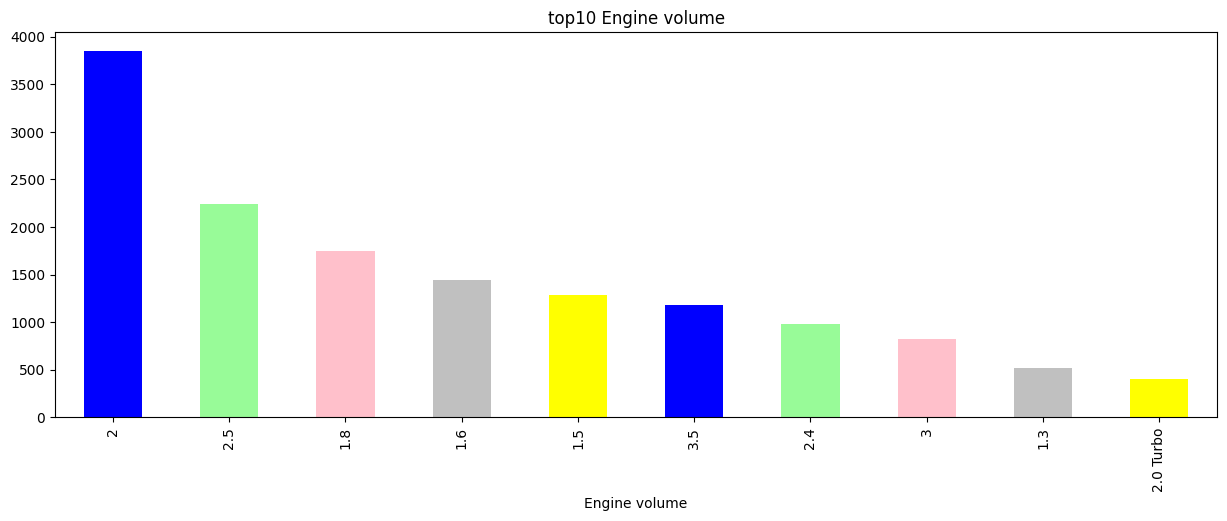

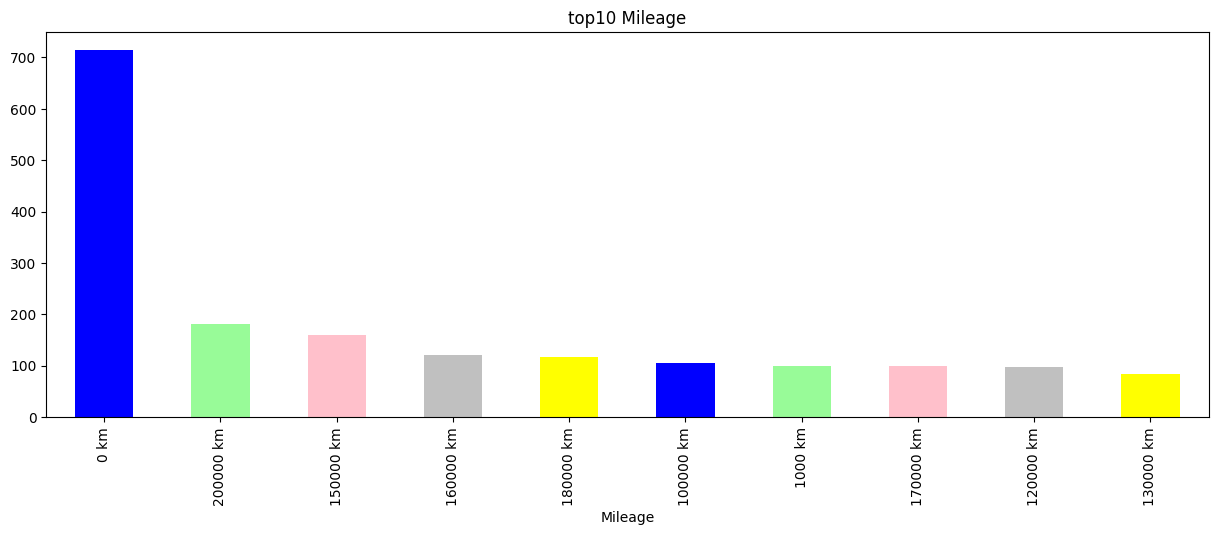

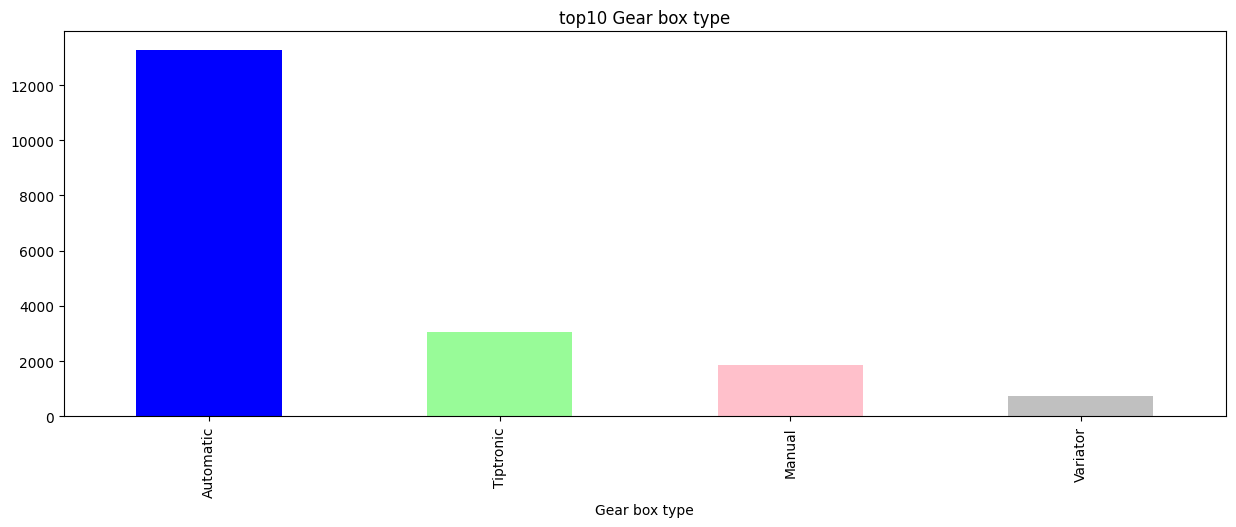

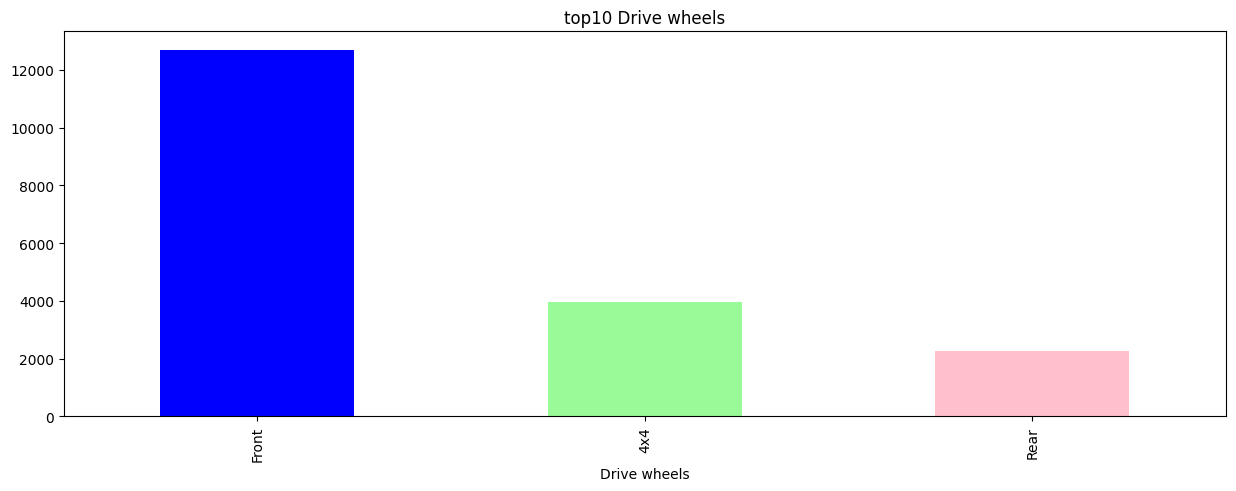

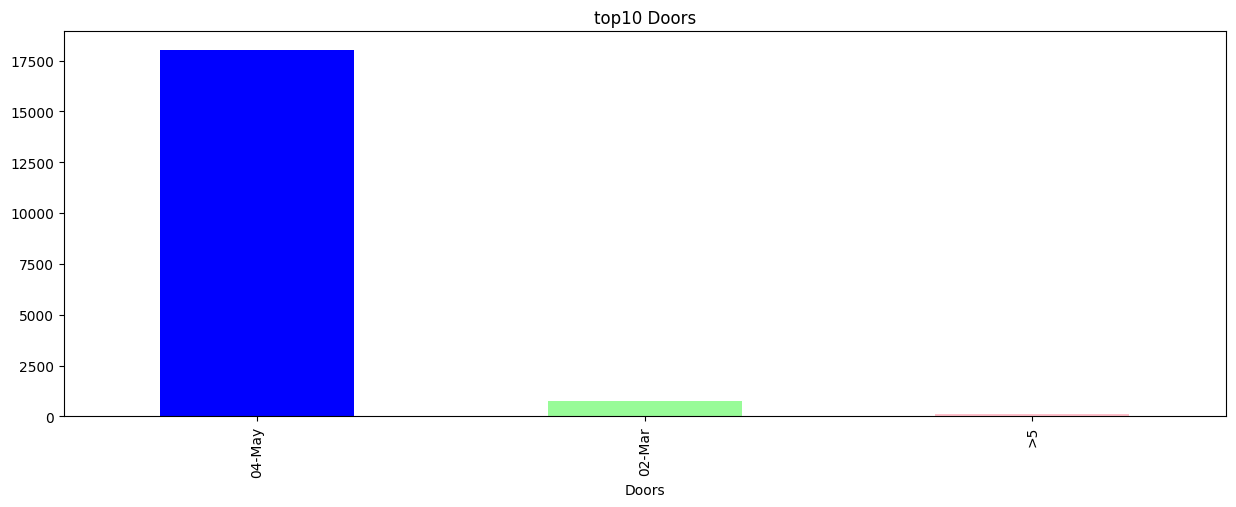

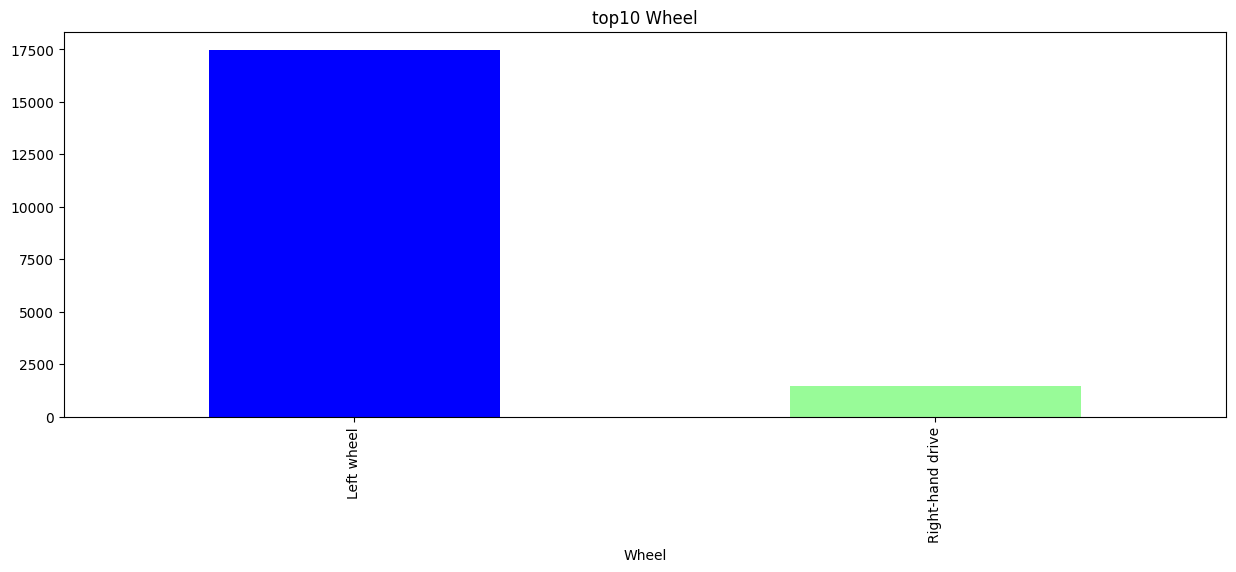

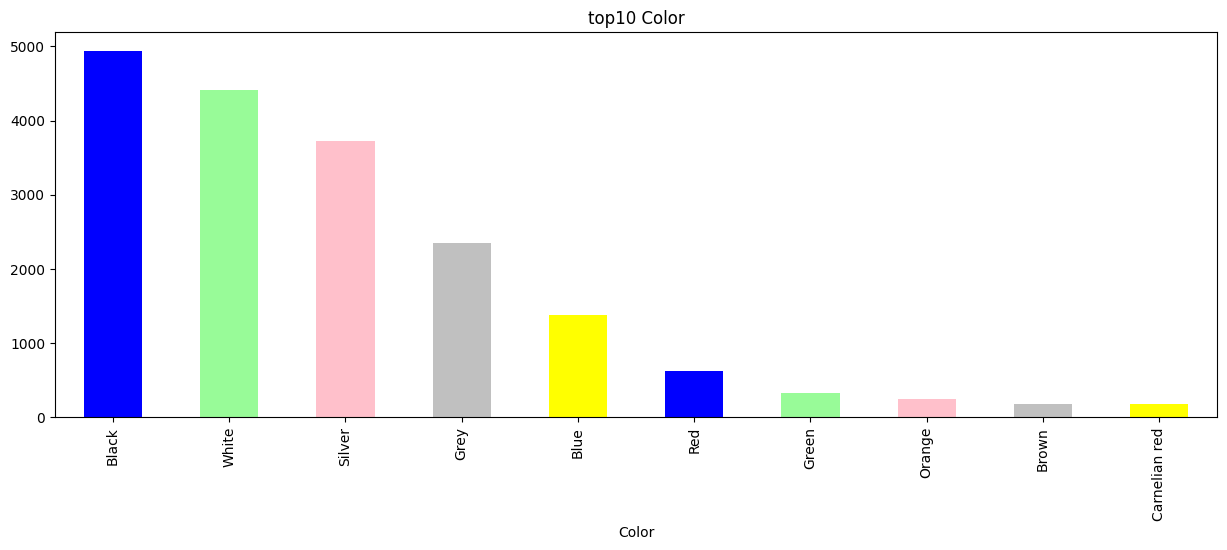

In [18]:
for col in df_obj:
    plt.figure(figsize=(15,5))
    top10= df[col].value_counts()[:10]
    colors=['blue','PaleGreen','Pink','Silver','Yellow']
    top10.plot(kind='bar',color=colors)
    plt.title('top10'+" "+col)
    plt.show()

### Manufacturer  (cars)

In [19]:
top10cars=df['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

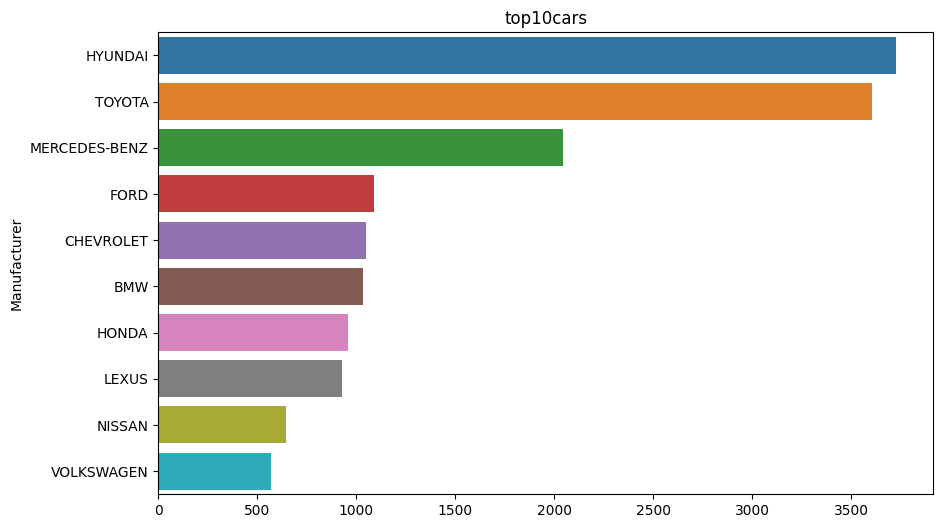

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10cars.values, y=top10cars.index)
plt.title('top10cars')
plt.show()

### Manufacturer Price

In [21]:
m_p=df.groupby(['Manufacturer'])['Price'].sum().sort_values(ascending=False)[:10]
m_p

Manufacturer
HYUNDAI          83179077
TOYOTA           51574627
MERCEDES-BENZ    37980047
OPEL             29096058
BMW              21351409
LEXUS            18588755
FORD             16768093
CHEVROLET        15594933
HONDA            13595591
SSANGYONG        13574696
Name: Price, dtype: int64

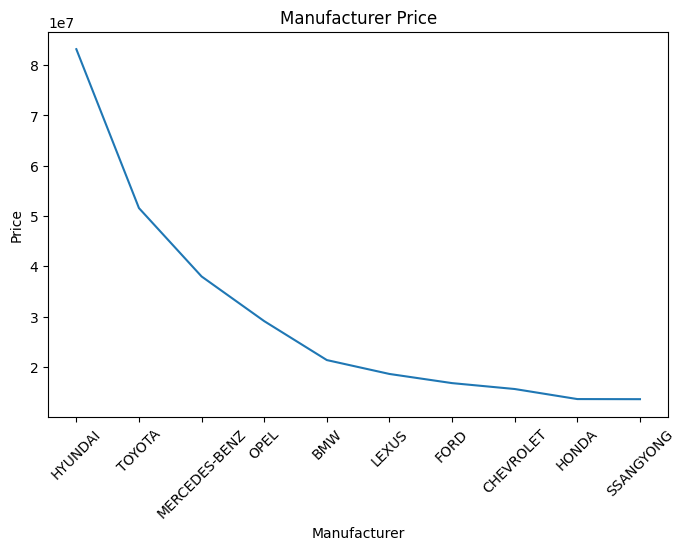

In [22]:
plt.figure(figsize = (8, 5))
plt.plot(m_p)
plt.xticks(rotation = 45)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Manufacturer Price')

plt.show()

## 4- Data Processing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [24]:
df=df.drop(['ID','Doors'],axis=1)

In [25]:
df['Levy']=df['Levy'].astype(int)

In [26]:
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']

0        186005 
1        192000 
2        200000 
3        168966 
4         91901 
          ...   
19232    300000 
19233    161600 
19234    116365 
19235     51258 
19236    186923 
Name: Mileage, Length: 18924, dtype: object

In [27]:
df['Mileage'].unique()   

array(['186005 ', '192000 ', '200000 ', ..., '140607 ', '307325 ',
       '186923 '], dtype=object)

In [28]:
df['Mileage']=df['Mileage'].astype(int)

In [29]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [30]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']

0         3.5
1           3
2         1.3
3         2.5
4         1.3
         ... 
19232    2.0 
19233     2.4
19234       2
19235       2
19236     2.4
Name: Engine volume, Length: 18924, dtype: object

In [31]:
df['Engine volume']=df['Engine volume'].astype(float)

In [32]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usa

### Transform Data

In [34]:
d_object=df.select_dtypes(include='object')
d_numeric=df.select_dtypes(exclude='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [36]:
for i in range(0,d_object.shape[1]):
    d_object.iloc[:,i]=la.fit_transform(d_object.iloc[:,i])

In [37]:
d_object

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,32,1242,4,1,2,0,0,0,12
1,8,658,4,0,5,2,0,0,1
2,21,684,3,0,5,3,1,1,1
3,16,661,4,1,2,0,0,0,14
4,21,684,3,1,5,0,1,0,12
...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12
19233,23,1334,9,1,5,2,1,0,11
19234,23,1442,4,1,1,0,1,0,7
19235,8,456,4,1,1,0,1,0,1


In [38]:
d_numeric

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,13328,1399,2010,3.5,186005,6.0,12
1,16621,1018,2011,3.0,192000,6.0,8
2,8467,0,2006,1.3,200000,4.0,2
3,3607,862,2011,2.5,168966,4.0,0
4,11726,446,2014,1.3,91901,4.0,4
...,...,...,...,...,...,...,...
19232,8467,0,1999,2.0,300000,4.0,5
19233,15681,831,2011,2.4,161600,4.0,8
19234,26108,836,2010,2.0,116365,4.0,4
19235,5331,1288,2007,2.0,51258,4.0,4


In [39]:
df=pd.concat([d_object,d_numeric],axis=1)
df

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,32,1242,4,1,2,0,0,0,12,13328,1399,2010,3.5,186005,6.0,12
1,8,658,4,0,5,2,0,0,1,16621,1018,2011,3.0,192000,6.0,8
2,21,684,3,0,5,3,1,1,1,8467,0,2006,1.3,200000,4.0,2
3,16,661,4,1,2,0,0,0,14,3607,862,2011,2.5,168966,4.0,0
4,21,684,3,1,5,0,1,0,12,11726,446,2014,1.3,91901,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12,8467,0,1999,2.0,300000,4.0,5
19233,23,1334,9,1,5,2,1,0,11,15681,831,2011,2.4,161600,4.0,8
19234,23,1442,4,1,1,0,1,0,7,26108,836,2010,2.0,116365,4.0,4
19235,8,456,4,1,1,0,1,0,1,5331,1288,2007,2.0,51258,4.0,4


## 4- Model

In [40]:
X = df.drop('Price', axis=1)
y = df['Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(15139, 15)
(3785, 15)


In [42]:
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR']
R2=[]
RMSE=[]

In [43]:
def models(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    rmse= np.sqrt(mean_squared_error(y_test,pred))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(X_test,y_test)
    print(f"The Score Model is :{score}")


In [44]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model6=SVR()


In [45]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model6)


The Score Model is :0.025219057775601295
The Score Model is :0.3958604283823072
The Score Model is :-2.7937195729048043
The Score Model is :-125.04474184104679
The Score Model is :-0.048129020371945996


In [46]:
DF=pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'Rmse':RMSE})
DF

,Algorithm,R2_score,Rmse
0,LinearRegression,0.025219,18371.082128
1,DecisionTreeRegressor,0.395860,14462.716242
2,RandomForestRegressor,-2.793720,36242.140228
3,GradientBoostingRegressor,-125.044742,208902.477388
4,SVR,-0.048129,19049.720002


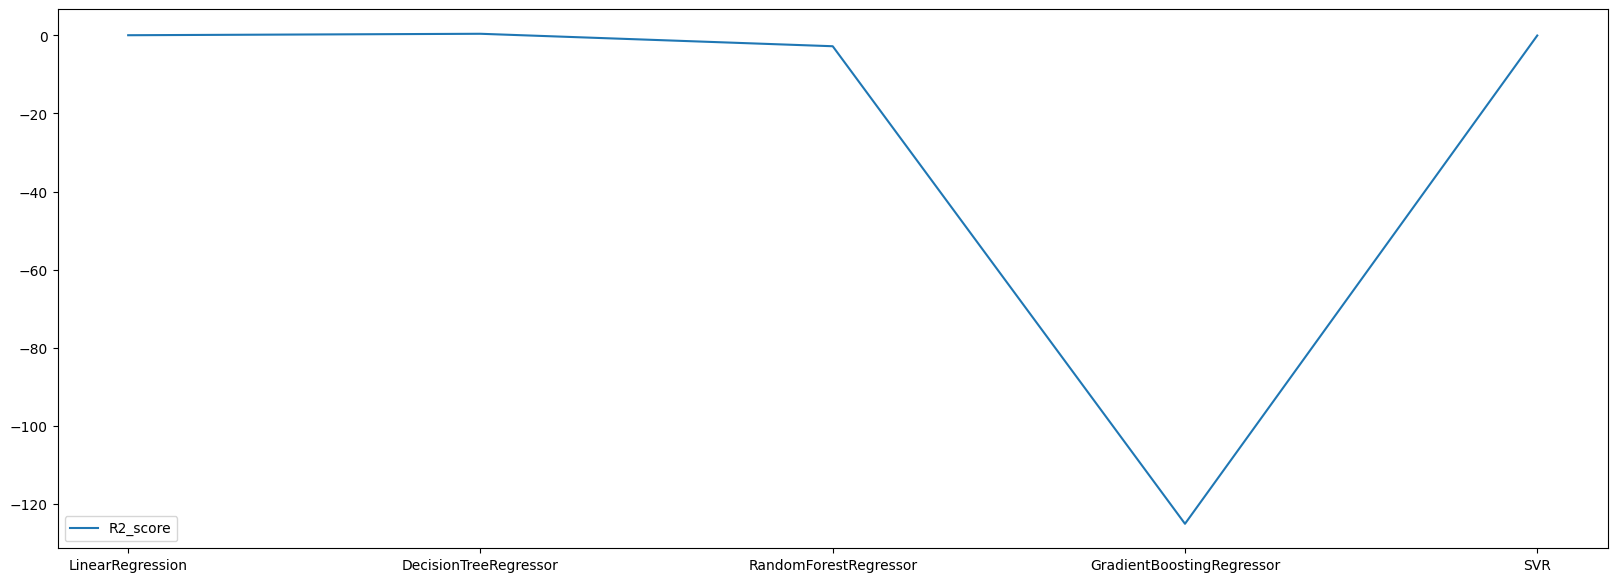

In [47]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.R2_score,label='R2_score')
plt.legend()
plt.show()

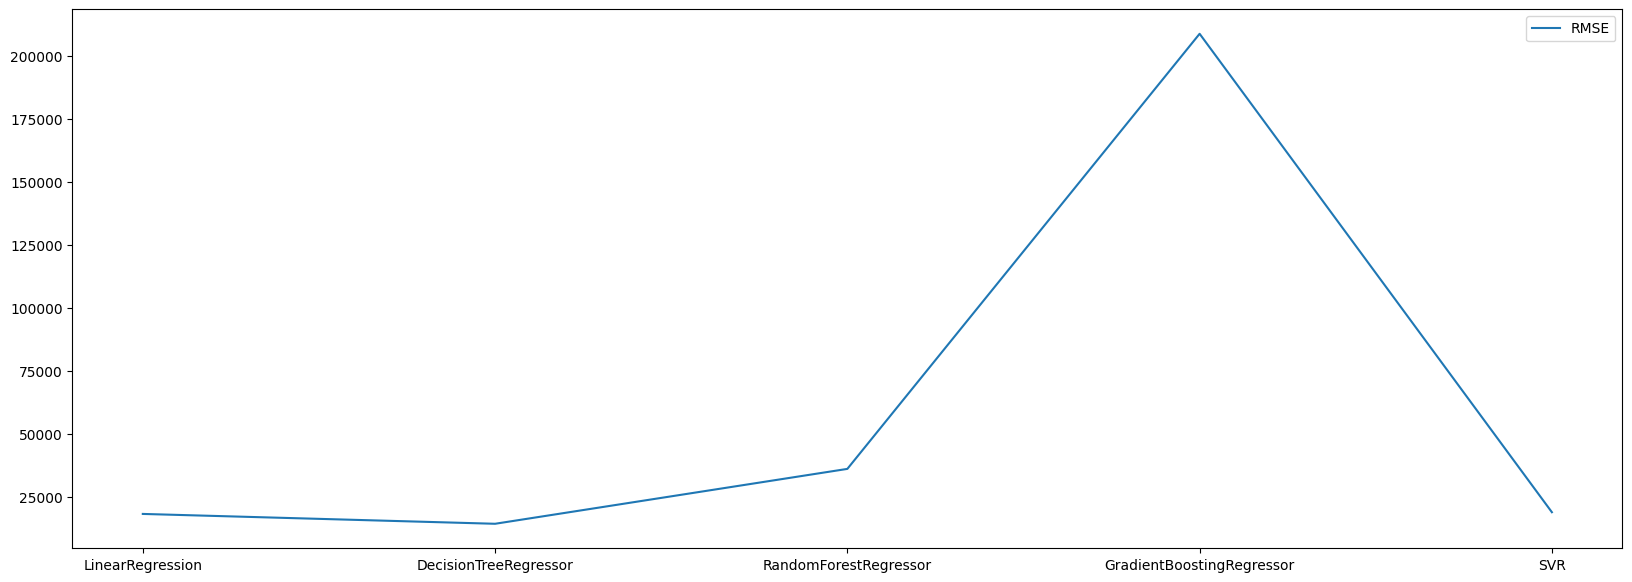

In [48]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.Rmse,label='RMSE')
plt.legend()
plt.show()